In [ ]:
import pandas as pd

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

DF_MAIN_MOD_NORETIRES = 'data/df_main_mod_noretires.csv'

pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 160)

# Uczenie maszynowe
Wykorzystwany jest model RandomForestRegressor. Trenowania dokonujemy na samodzielnie wykrojonej części danych za pomocą metody cross-validation o 5 foldach.<br>
Sprawdzanie jakości przewidywań za pomocą średniego błędu bezwzględnego pozwala sprawdzić, że najbardziej optymalną ilością estymatorów jest 150.

Dzieląc wartość MAE dla modelu o 150 estymatorach przez średnią docelowej kolumny "p3350-stopień-wykorzystania-miejsc-noclegowych-w-kolejnym-roku" otrzymujemy, że wyniki przewidywań odchylone są od wartości faktycznych o około 25%. To dosyć dużo, ale same dane (oraz ich dobór względem celu) ma sobie wiele do zarzucenia.

In [2]:
df = pd.read_csv(DF_MAIN_MOD_NORETIRES)
Y = df['p3350-stopień-wykorzystania-miejsc-noclegowych-w-kolejnym-roku']
X = df.drop(['p3350-stopień-wykorzystania-miejsc-noclegowych-w-kolejnym-roku'], axis=1).copy()

X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, 
                                                      train_size=0.8, test_size=0.2,
                                                      random_state=0)


In [3]:
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, Y_train)
preds = model.predict(X_valid)
MAE1 = mean_absolute_error(Y_valid, preds)

3.5147356164383567

In [15]:
def get_score(n_esti):
    model2 = RandomForestRegressor(n_estimators=n_esti, random_state=0)
    scores = -1 * cross_val_score(model2, X, Y,
                                  cv=5,
                                  scoring='neg_mean_absolute_error')
    return scores.mean()

In [16]:
results = {i : get_score(i) for i in range(50,450,50)}

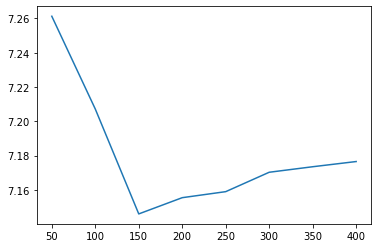

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(list(results.keys()), list(results.values()))
plt.show()

In [18]:
get_score(150)/Y.mean()

0.2582033902443773